In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import uproot
import awkward
import numpy as np

In [2]:
file0 = "/uscms_data/d3/wsi/lpcdm/CMSSW_10_2_14/src/Firefighter/ffConfig/python/test/ffNtuple_pickeventsDoubleMuon2018ABC.root"
file1 = "/uscms_data/d3/wsi/lpcdm/CMSSW_10_2_14/src/Firefighter/ffConfig/python/test/ffNtuple_pickeventsDoubleMuon2018D.root"
file2 = "/uscms_data/d3/wsi/lpcdm/CMSSW_10_2_14/src/Firefighter/ffConfig/python/test/ffNtuple_signal-4mu.root"

---
# ABC

In [3]:
t0 = uproot.open(file0)['ffNtuplizer/ffNtuple']

In [5]:
cosmicevents = [171885587, 588925175, 638569038, 1194219475, 1843404323, 767319972, 578254197]
events = t0['event'].array()
cosmicmask0 = np.logical_or.reduce([(events==e) for e in cosmicevents])

In [5]:
t0['ljmisc_numParallelDsa'].array()[cosmicmask0]

array([], dtype=uint32)

In [6]:
t0['ljmisc_numParallelCosmic'].array()[cosmicmask0]

array([], dtype=uint32)

$p_T$

In [6]:
# pt0 = NestNestObjArrayToJagged(t0['ljmisc_dsaPt'].array())
pt0 = awkward.fromiter(t0['ljmisc_dsaPt'].array())

for x in pt0[~cosmicmask0]:
    print(x)

[[] []]
[[6197.8936] []]
[[8683.915] []]
[[8938.826] []]
[[12726.312] [1886.6146]]
[[8147.747] [] []]
[[7285.0103] []]
[[5297.2344] []]
[[] []]
[[6113.123] [22.902737]]
[[9239.855] []]


$\sigma_{p_T}/p_T$

In [13]:
pterror0 = NestNestObjArrayToJagged(t0['ljmisc_dsaPtError'].array())
for x in (pterror0/pt0)[~cosmicmask0]:
    print(x)

[[] []]
[[56.225407] []]
[[1171.5598] []]
[[143.7143] []]
[[773.8776] [20.880589]]
[[1012.57544] [] []]
[[1549.4639] []]
[[1058.5302] []]
[[] []]
[[209.52953] [0.576435]]
[[380.46198] []]


In [13]:
NestNestObjArrayToJagged(t0['ljmisc_dsaIsSubsetRecoMuonWithInnerTrack'].array())[~cosmicmask0]

<JaggedArray [[[] []] [[True] []] [[True] []] ... [[] []] [[True] [True]] [[True] []]] at 0x7f11b1ab3940>

[18 12  8 17 11  9 11 10 12]


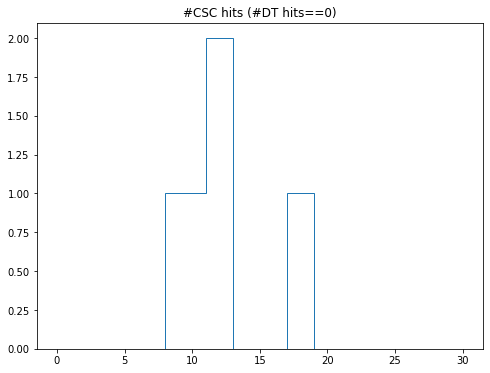

In [14]:
pt0 = NestNestObjArrayToJagged(t0['ljmisc_dsaPt'].array())
dthits = NestNestObjArrayToJagged(t0['ljmisc_dsaNumValidDTHits'].array())
cschits = NestNestObjArrayToJagged(t0['ljmisc_dsaNumValidCSCHits'].array())
interestedpt = (pt0<13000) & (pt0>2000)

data = cschits[interestedpt&(dthits==0)][~cosmicmask0]

print(data.flatten().flatten())
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(data.flatten().flatten(), bins=30, range=[0, 30], histtype='step')
ax.set_title('#CSC hits (#DT hits==0)');

---
# D

In [3]:
t1 = uproot.open(file1)['ffNtuplizer/ffNtuple']

In [4]:
cosmicevents=  [99710070, 131158592, 310216566, 12032414, 1382227313, 499511766, 499511766, 599103865, 988893070, 1645464771, 200924923]
events = t1['event'].array()
cosmicmask1 = np.logical_or.reduce([(events==e) for e in cosmicevents])

In [5]:
t1['ljmisc_numParallelDsa'].array()[cosmicmask1]

array([], dtype=uint32)

In [6]:
t1['ljmisc_numParallelCosmic'].array()[cosmicmask1]

array([], dtype=uint32)

$p_T$

In [18]:
pt1 = NestNestObjArrayToJagged(t1['ljmisc_dsaPt'].array())

for x in pt1[~cosmicmask1]: print(x)

[[8485.456] []]
[[6346.4585] []]
[[7042.574] []]
[[6595.5625] [] []]
[[5818.4844] []]
[[7952.4844] []]
[[7157.8745] []]
[[5245.2046] []]
[[] []]


$\sigma_{p_T}/p_T$

In [19]:
pterror1 = NestNestObjArrayToJagged(t1['ljmisc_dsaPtError'].array())
for x in (pterror1/pt1)[~cosmicmask1]:
    print(x)

[[114.2326] []]
[[2565.844] []]
[[77.17486] []]
[[81.229774] [] []]
[[452.20578] []]
[[204.19633] []]
[[1126.4628] []]
[[180.03816] []]
[[] []]


In [21]:
for x in NestNestObjArrayToJagged(t1['ljmisc_dsaIsSubsetRecoMuonWithInnerTrack'].array())[~cosmicmask1]:
    print(x)

[[True] []]
[[True] []]
[[True] []]
[[True] [] []]
[[True] []]
[[True] []]
[[True] []]
[[True] []]
[[] []]


[18  9 18 18 12 10 24 12]


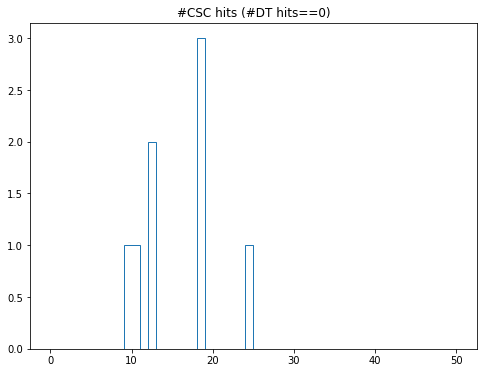

In [23]:
pt1 = NestNestObjArrayToJagged(t1['ljmisc_dsaPt'].array())
dthits = NestNestObjArrayToJagged(t1['ljmisc_dsaNumValidDTHits'].array())
cschits = NestNestObjArrayToJagged(t1['ljmisc_dsaNumValidCSCHits'].array())
interestedpt = (pt1<13000) & (pt1>2000)

data = cschits[interestedpt&(dthits==0)][~cosmicmask1]
print(data.flatten().flatten())

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(data.flatten().flatten(), bins=50, range=[0, 50], histtype='step')
ax.set_title('#CSC hits (#DT hits==0)');

---
# signal

In [22]:
t2 = uproot.open(file2)['ffNtuplizer/ffNtuple']

In [25]:
t2['ljmisc_numParallelDsa'].array()

array([ 1,  1,  0,  0,  1,  1,  1,  2,  1,  2,  1,  3,  6,  2,  3,  1,  1,
        1,  2,  1,  3,  0,  3,  1,  1,  1,  6,  0,  7,  0,  3,  0,  2,  1,
        1,  0,  1,  1,  1,  1,  0,  7,  1,  3,  3,  1,  2,  0,  0,  0,  1,
        4,  1,  2,  1,  1,  0,  1,  1,  2,  0,  2,  2, 10,  0,  0,  1,  0,
        1,  0,  1,  1,  6,  1,  2,  2,  0,  1,  7,  1,  1,  1,  0,  1,  0,
        0,  1,  2,  3,  1,  3,  2,  3,  2,  1,  1,  1,  0,  1,  2,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  2,  4,  1,  0,  0,  1,  0,
        3,  3,  1,  2,  1,  1,  0,  1,  1,  1,  1,  1,  1,  4,  1,  2,  0,
        1,  1,  1,  0,  0,  2,  1,  4,  0,  2,  0,  0,  0,  2,  0,  1,  1,
        2,  3,  1,  1,  1,  4,  1,  3,  0,  1], dtype=uint32)

In [26]:
t2['ljmisc_numParallelCosmic'].array()

array([1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 3, 0,
       3, 1, 1, 1, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 1, 1, 0,
       2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1,
       3, 2, 0, 0, 2, 0, 1, 1, 0], dtype=uint32)

In [29]:
NestNestObjArrayToJagged(t2['ljmisc_dsaIsSubsetRecoMuonWithInnerTrack'].array())

<JaggedArray [[[]] [[False]] [[]] ... [[True]] [[True]] [[False False]]] at 0x7f11afda9c88>

In [23]:
from coffea.analysis_objects import JaggedCandidateArray
df = t2
leptonjets = JaggedCandidateArray.candidatesfromcounts(
    df['pfjet_p4'].array(),
    px=df['pfjet_p4.fCoordinates.fX'].array().content,
    py=df['pfjet_p4.fCoordinates.fY'].array().content,
    pz=df['pfjet_p4.fCoordinates.fZ'].array().content,
    energy=df['pfjet_p4.fCoordinates.fT'].array().content,
)
genparticles = JaggedCandidateArray.candidatesfromcounts(
    df['gen_p4'].array(),
    px=df['gen_p4.fCoordinates.fX'].array().content,
    py=df['gen_p4.fCoordinates.fY'].array().content,
    pz=df['gen_p4.fCoordinates.fZ'].array().content,
    energy=df['gen_p4.fCoordinates.fT'].array().content,
    pid=df['gen_pid'].array().content
)
darkphotons = genparticles[genparticles.pid==32]
matchmask = leptonjets.match(darkphotons, deltaRCut=0.3)

/uscms/home/wsi/nobackup/miniconda3/envs/FireHydrant/lib/python3.7/site-packages/coffea/analysis_objects/JaggedCandidateArray.py:22: RuntimeWarning: divide by zero encountered in true_divide
  return np.arcsinh(pz / pT)


In [31]:
issubset = NestNestObjArrayToJagged(t2['ljmisc_dsaIsSubsetRecoMuonWithInnerTrack'].array())
for x in issubset[matchmask]: print(x)

[]
[[False]]
[[]]
[[]]
[[]]
[[]]
[[False True]]
[[]]
[[]]
[[] []]
[[]]
[[True]]
[[True True] [True]]
[[]]
[[]]
[[True False]]
[[False]]
[[False]]
[[False False] [True True]]
[[True True]]
[[False False]]
[[False False]]
[[] []]
[[True]]
[[False]]
[[]]
[[False True] []]
[[False False]]
[[]]
[[True True]]
[[] []]
[[False False]]
[[False False]]
[[False]]
[[False False] [False False]]
[[False]]
[[False] []]
[[True]]
[[True]]
[[]]
[[] []]
[[True True]]
[[]]
[[False False]]
[[False False]]
[[False]]
[[False] []]
[[True] []]
[[True]]
[[]]
[[]]
[[] []]
[[]]
[[]]
[[True]]
[[False True]]
[[]]
[[]]
[[True True]]
[[False False] [False]]
[[]]
[[False False] [False]]
[[False False]]
[[False]]
[[False False] [False False]]
[[False]]
[[True]]
[[False False]]
[[]]
[[]]
[[False False]]
[[True True] []]
[[True]]
[[True]]
[[]]
[[False]]
[[] [True]]
[[True] []]
[[]]
[[]]
[[False False]]
[[]]
[[]]
[[False False]]
[[True]]
[[True]]
[[] []]
[[] [True True]]
[[True True]]
[[] []]
[[False] []]
[[] [True True]]

$p_T$

In [25]:
pt2 = NestNestObjArrayToJagged(t2['ljmisc_dsaPt'].array())
for x in pt2[matchmask]:
    print(x)

[]
[[26.088802]]
[[]]
[[]]
[[]]
[[]]
[[64.760895 30.677803]]
[[]]
[[]]
[[] []]
[[]]
[[21.985373]]
[[65.746796 26.242092] [34.892612]]
[[]]
[[]]
[[41.735012 28.44255]]
[[63.25023]]
[[34.18125]]
[[106.14401 44.820675] [66.09935 33.06576]]
[[55.499065 25.7597]]
[[28.061365 23.623022]]
[[30.897182 21.91693]]
[[] []]
[[28.788527]]
[[57.6834]]
[[]]
[[64.5226 22.321308] []]
[[48.09988 26.687643]]
[[]]
[[31.732323 23.621061]]
[[] []]
[[38.039215 20.037048]]
[[29.103645 21.649426]]
[[34.290203]]
[[43.636692 30.736782] [26.0901 22.629562]]
[[29.989388]]
[[23.316744] []]
[[31.787165]]
[[35.294395]]
[[]]
[[] []]
[[31.247627 28.39176]]
[[]]
[[45.31768 41.30792]]
[[24.622345 20.798166]]
[[81.59806]]
[[52.43712] []]
[[76.8633] []]
[[70.431625]]
[[]]
[[]]
[[] []]
[[]]
[[]]
[[73.49448]]
[[36.569473 21.917902]]
[[]]
[[]]
[[26.355555 25.167486]]
[[54.47176 36.203262] [79.98209]]
[[]]
[[33.501682 28.262976] [27.590584]]
[[604.99255 59.984924]]
[[87.79179]]
[[58.046577 33.52016] [47.08294 36.291176]]
[[41.

$\sigma_{p_T}/p_T$

In [24]:
pt2 = NestNestObjArrayToJagged(t2['ljmisc_dsaPt'].array())
pterror2 = NestNestObjArrayToJagged(t2['ljmisc_dsaPtError'].array())

for x in (pterror2/pt2)[matchmask]:
    print(x)

[]
[[0.14462744]]
[[]]
[[]]
[[]]
[[]]
[[3.1510682 0.38499555]]
[[]]
[[]]
[[] []]
[[]]
[[0.10195226]]
[[0.7399065 3.1442378] [0.12348663]]
[[]]
[[]]
[[0.075741515 0.17191838]]
[[0.19594774]]
[[0.14498274]]
[[0.862267 0.0738158] [0.36408782 0.18493654]]
[[0.18561675 0.14680466]]
[[0.13511102 0.12165949]]
[[0.20008856 0.13912301]]
[[] []]
[[0.42337984]]
[[0.17753297]]
[[]]
[[0.73692745 0.29353976] []]
[[0.16306315 0.3877609]]
[[]]
[[0.13127555 0.1378609]]
[[] []]
[[0.122451074 0.22187155]]
[[0.20078392 0.14974922]]
[[0.12607405]]
[[0.19918066 0.18312937] [0.113796934 0.22954412]]
[[0.15176006]]
[[0.21633601] []]
[[0.12091444]]
[[0.06895518]]
[[]]
[[] []]
[[0.23518313 0.19459791]]
[[]]
[[0.117483504 0.13190734]]
[[0.16064954 0.12249446]]
[[0.17011909]]
[[0.19479215] []]
[[1.3769563] []]
[[0.16306016]]
[[]]
[[]]
[[] []]
[[]]
[[]]
[[0.195617]]
[[0.15114808 0.12328575]]
[[]]
[[]]
[[0.15035854 0.38001063]]
[[0.18166699 0.07421344] [0.19732955]]
[[]]
[[0.07349869 0.15032594] [0.18121652]]
[[2.4

In [65]:
candspt = NestNestObjArrayToJagged(t2['pfjet_pfcand_pt'].array())
candstype = NestNestObjArrayToJagged(t2['pfjet_pfcand_type'].array())
candsmupt = candspt[(candstype==8)]
for x in candsmupt[matchmask]:
    print(x)

[[26.088802]]
[]
[[]]
[[]]
[[]]
[[]]
[[64.760895 30.677803]]
[[]]
[[]]
[[]]
[[] []]
[[21.985373]]
[[65.746796 26.242092] [34.892612]]
[[]]
[[41.735012 28.44255]]
[[]]
[[63.25023]]
[[34.18125]]
[[106.14401 44.820675] [66.09935 33.06576]]
[[55.499065 25.7597]]
[[30.897182 21.91693]]
[[28.061365 23.623022]]
[[] []]
[[28.788527]]
[[]]
[[57.6834]]
[[64.5226 22.321308] []]
[[48.09988 26.687643]]
[[]]
[[31.732323 23.621061]]


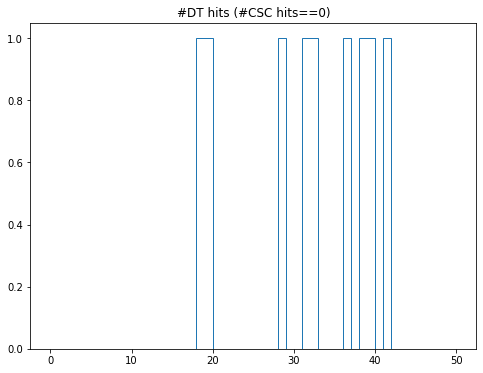

In [79]:
dthits = NestNestObjArrayToJagged(t2['ljmisc_dsaNumValidDTHits'].array())
cschits = NestNestObjArrayToJagged(t2['ljmisc_dsaNumValidCSCHits'].array())

data = dthits[cschits==0]


fig, ax = plt.subplots(figsize=(8,6))
ax.hist(data.flatten().flatten(), bins=50, range=[0, 50], histtype='step')
ax.set_title('#DT hits (#CSC hits==0)');

[30 12 18  9 24 16 23 17 24 21 22 23 28 12]


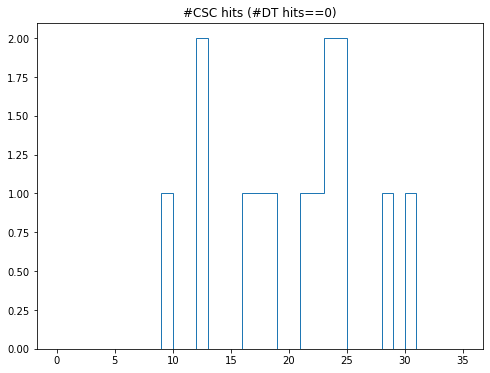

In [98]:
dthits = NestNestObjArrayToJagged(t2['ljmisc_dsaNumValidDTHits'].array())
cschits = NestNestObjArrayToJagged(t2['ljmisc_dsaNumValidCSCHits'].array())

data = cschits[dthits==0][matchmask]
print(data.flatten().flatten())

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(data.flatten().flatten(), bins=35, range=[0, 35], histtype='step')
ax.set_title('#CSC hits (#DT hits==0)');

# summary

- cosmic muons: # < 8
- ptError/pt < 8

In [2]:
f0 = 'root://cmseos.fnal.gov//eos/uscms/store/group/lpcmetx/SIDM/ffNtuple/2018/QCD_Pt-20to30_MuEnrichedPt5_TuneCP5_13TeV_pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v4/190827_040339/0000/ffNtuple_100.root'
f1 = 'root://cmseos.fnal.gov//eos/uscms/store/group/lpcmetx/SIDM/ffNtuple/2018/QCD_Pt-20to30_MuEnrichedPt5_TuneCP5_13TeV_pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v4/190827_040339/0000/ffNtuple_10.root'

In [3]:
h0 = uproot.open(f0)['ffNtupleStat/pileup']
h1 = uproot.open(f0)['ffNtupleStat/pileup']

In [4]:
h0.__add__?

Signature:      h0.__add__(value, /)
Call signature: h0.__add__(*args, **kwargs)
Type:           method-wrapper
String form:    <method-wrapper '__add__' of TH1D object at 0x7fab53f69688>
Docstring:      Return self+value.


In [7]:
h1.allnumpy()

(array([0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 6.000e+00,
        4.000e+00, 1.600e+01, 4.000e+01, 5.600e+01, 1.010e+02, 2.100e+02,
        3.110e+02, 4.530e+02, 6.840e+02, 9.270e+02, 1.289e+03, 1.641e+03,
        2.007e+03, 2.446e+03, 2.891e+03, 3.350e+03, 3.793e+03, 4.283e+03,
        4.785e+03, 5.115e+03, 5.633e+03, 6.026e+03, 6.144e+03, 6.605e+03,
        6.781e+03, 7.118e+03, 7.419e+03, 7.518e+03, 7.626e+03, 7.775e+03,
        7.774e+03, 7.675e+03, 7.564e+03, 7.400e+03, 7.237e+03, 6.711e+03,
        6.393e+03, 5.976e+03, 5.618e+03, 5.535e+03, 4.935e+03, 4.497e+03,
        3.929e+03, 3.751e+03, 3.120e+03, 2.819e+03, 2.564e+03, 2.102e+03,
        1.774e+03, 1.528e+03, 1.249e+03, 1.056e+03, 8.110e+02, 6.510e+02,
        5.580e+02, 4.130e+02, 3.260e+02, 2.640e+02, 2.000e+02, 1.560e+02,
        1.080e+02, 7.300e+01, 8.400e+01, 5.100e+01, 4.100e+01, 2.000e+01,
        2.000e+01, 1.300e+01, 1.100e+01, 6.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 3.000e+0